In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_csv('Copy of archive(1)/urldata.csv', index_col=0)
df1.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [3]:
df1.result[df1['label']=='benign'].unique()

array([0], dtype=int64)

In [4]:
df1.label[df1['result']==1].unique()

array(['malicious'], dtype=object)

In [5]:
df1.shape

(450176, 3)

In [6]:
def PreProcessing(df):
    feature = {'url_length':[], 
            'WWW Present':[], 
            'Digit to Alphabet ratio':[],  
            'Uppercase to LowercaseRatio':[], 
            'Dots':[], 
            'Semicolon':[],
            'Underscore':[], 
            'Question Mark':[], 
            'Exclamation Mark':[],
            'Hash Character':[], 
            'Equals':[], 
            'Percentage Character':[], 
            'Ampersand':[], 
            'Dash':[], 
            'Double Slash':[], 
            'Https in URL':[]}

    for url in df['url']:
        
        feature['url_length'].append(len(url))
        
        if 'www' in url.lower():
            feature['WWW Present'].append(1)
        else:
            feature['WWW Present'].append(0)
        
        if 'https' in url.lower():
            feature['Https in URL'].append(1)
        else:
            feature['Https in URL'].append(0)
        
        feature['Dots'].append(url.count('.'))
        feature['Semicolon'].append(url.count(';'))
        feature['Underscore'].append(url.count('_'))
        feature['Question Mark'].append(url.count('?'))
        feature['Exclamation Mark'].append(url.count('!'))
        feature['Hash Character'].append(url.count('#'))
        feature['Equals'].append(url.count('='))
        feature['Percentage Character'].append(url.count('%'))
        feature['Ampersand'].append(url.count('&'))
        feature['Dash'].append(url.count('-'))
        feature['Double Slash'].append(url.count('//'))

        alpha = 0
        num = 0
        upper = 0
        lower = 0
        
        for i in url:
            if i.isalpha():
                alpha += 1
            if i.isnumeric():
                num += 1
            if i.isupper():
                upper += 1
            if i.islower():
                lower += 1
            
        feature['Digit to Alphabet ratio'].append(num/alpha)
        feature['Uppercase to LowercaseRatio'].append(upper/lower)
        
    new_df = pd.DataFrame(feature)
        
    df = pd.concat([df, new_df], axis=1)
        
    return df

In [7]:
df1 = PreProcessing(df1)
df1.head()

,url,label,result,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
0,https://www.google.com,benign,0,22,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
1,https://www.youtube.com,benign,0,23,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
2,https://www.facebook.com,benign,0,24,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
3,https://www.baidu.com,benign,0,21,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1
4,https://www.wikipedia.org,benign,0,25,1,0.0,0.0,2,0,0,0,0,0,0,0,0,0,1,1


In [8]:
df1.tail(30)

,url,label,result,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
450146,http://leentra1.com/ST/SOS,malicious,1,26,0,0.052632,0.357143,1,0,0,0,0,0,0,0,0,0,1,0
450147,http://nb84.servidoraweb.net/load/dropbox2016/...,malicious,1,60,0,0.136364,0.023256,3,0,0,0,0,0,0,0,0,0,1,0
450148,http://www.yourbusinesswebapp.com/wp-content/t...,malicious,1,77,1,0.000000,0.000000,3,0,0,0,0,0,0,0,0,1,1,0
450149,http://draywalejohn.com/Google/,malicious,1,31,0,0.000000,0.041667,1,0,0,0,0,0,0,0,0,0,1,0
450150,http://www.sadhakayogaiyengar.com/wp-includes/...,malicious,1,69,1,0.000000,0.035714,3,0,0,0,0,0,0,0,0,1,1,0
450151,http://gaptrade.cl/file/bless/index.php?email=,malicious,1,46,0,0.000000,0.000000,2,0,0,1,0,0,1,0,0,0,1,0
450152,http://gospelchurchofchrist.org/best_update/pr...,malicious,1,63,0,0.000000,0.000000,2,0,1,0,0,0,0,0,0,0,1,0
450153,http://thepizzaplacesandimas.com/includes/book...,malicious,1,272,0,0.382716,0.038462,14,10,0,2,0,0,6,0,10,0,1,0
450154,http://ui3china.com/still/G.Docs/index.php,malicious,1,42,0,0.031250,0.066667,3,0,0,0,0,0,0,0,0,0,1,0
450155,http://ui3china.com/live/G.Docs/index.php,malicious,1,41,0,0.032258,0.068966,3,0,0,0,0,0,0,0,0,0,1,0


In [9]:
df1.describe()

,result,url_length,WWW Present,Digit to Alphabet ratio,Uppercase to LowercaseRatio,Dots,Semicolon,Underscore,Question Mark,Exclamation Mark,Hash Character,Equals,Percentage Character,Ampersand,Dash,Double Slash,Https in URL
count,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000,450176.000000
mean,0.231994,60.237849,0.802095,0.092747,0.039481,2.620553,0.047666,0.419527,0.152854,0.001353,0.001297,0.258044,0.090007,0.123265,1.251930,1.004563,0.784207
std,0.422105,37.571613,0.398420,0.211052,0.144652,1.144966,0.568434,1.337560,0.462658,0.055169,0.235577,0.910431,1.166887,0.797066,2.570521,0.079324,0.411372
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,40.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,52.000000,1.000000,0.018182,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,71.000000,1.000000,0.120690,0.045455,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,2314.000000,1.000000,5.500000,13.250000,32.000000,30.000000,200.000000,166.000000,10.000000,152.000000,34.000000,134.000000,37.000000,42.000000,7.000000,1.000000


In [10]:
y = df1['result']
x = df1.drop(columns=['url', 'label', 'result'])

In [11]:
df1_x = df1.drop(index=x[x.duplicated()].index)
y.drop(index=x[x.duplicated()].index, inplace=True)
x.drop(index=x[x.duplicated()].index, inplace=True)

<AxesSubplot:>

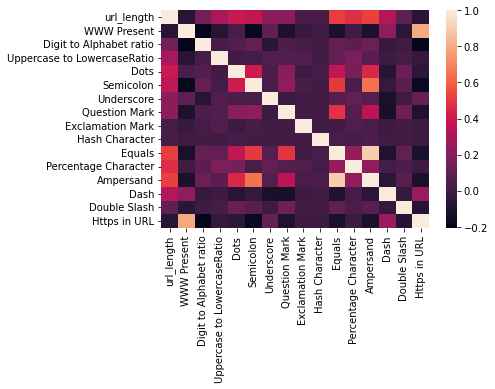

In [12]:
sns.heatmap(x.corr())

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47, stratify=y)

In [16]:
print(x_train.shape, x_test.shape, x.shape)

(121462, 16) (30366, 16) (151828, 16)


In [17]:
ss = StandardScaler()
ss.fit(x_test)

x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
sv = SVC()
params = {'kernel':['rbf', 'linear', 'poly'], 'C':[0.5, 1, 1.5, 2, 2.5, 3], 'degree':[2, 3, 4], 'gamma':[1, 2, 3, 4, 5]}
gscv_sv = GridSearchCV(estimator=sv, param_grid=params, n_jobs=-1)
gscv_sv.fit(x_train, y_train)

pred_sv = gscv_sv.predict(x_test)
print(confusion_matrix(y_test, pred_sv))
print(accuracy_score(y_test, pred_sv), recall_score(y_test, pred_sv), precision_score(y_test, pred_sv),  f1_score(y_test, pred_sv))

In [ ]:
ker = gscv_sv.best_params_['kernel']
c = gscv_sv.best_params_['C']
deg = gscv_sv.best_params_['degree']
gam = gscv_sv.best_params_['gamma']

In [ ]:
for i in [53, 72, 96, 21]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i, stratify=y)
    
    x_train = ss.transform(x_train)
    x_test = ss.transform(x_test)
    
    sv = SVC(C=c, kernel=ker, degree=deg, gamma = gam)
    sv.fit(x_train, y_train)

    pred_sv = sv.predict(x_test)
    print(confusion_matrix(y_test, pred_sv))
    print(accuracy_score(y_test, pred_sv), recall_score(y_test, pred_sv), precision_score(y_test, pred_sv),  f1_score(y_test, pred_sv))

In [18]:
import catboost as ctb

In [20]:
cb = ctb.CatBoostClassifier()
params = {'n_estimators':[500, 600, 700, 800, 900, 1000]}
gscv_cb = GridSearchCV(cb, param_grid = params, n_jobs = -1)
gscv_cb.fit(x_train ,y_train)

pred_cb = gscv_cb.predict(x_test)
print(confusion_matrix(y_test, pred_cb))
print(accuracy_score(y_test, pred_cb), recall_score(y_test, pred_cb), precision_score(y_test, pred_cb),  f1_score(y_test, pred_cb))

D:\AnacondaNavigator\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.99542243 0.99539774 0.9953648  0.99544713]
  warnings.warn(


Learning rate set to 0.079982
0:	learn: 0.4884317	total: 157ms	remaining: 2m 36s
1:	learn: 0.3391969	total: 174ms	remaining: 1m 26s
2:	learn: 0.2446293	total: 189ms	remaining: 1m 2s
3:	learn: 0.1817542	total: 205ms	remaining: 51s
4:	learn: 0.1397579	total: 221ms	remaining: 44s
5:	learn: 0.1084162	total: 238ms	remaining: 39.5s
6:	learn: 0.0887626	total: 255ms	remaining: 36.2s
7:	learn: 0.0736360	total: 272ms	remaining: 33.7s
8:	learn: 0.0619247	total: 291ms	remaining: 32.1s
9:	learn: 0.0535453	total: 310ms	remaining: 30.6s
10:	learn: 0.0472770	total: 331ms	remaining: 29.8s
11:	learn: 0.0425446	total: 350ms	remaining: 28.8s
12:	learn: 0.0389147	total: 368ms	remaining: 27.9s
13:	learn: 0.0363875	total: 388ms	remaining: 27.3s
14:	learn: 0.0344540	total: 409ms	remaining: 26.9s
15:	learn: 0.0327808	total: 426ms	remaining: 26.2s
16:	learn: 0.0314837	total: 445ms	remaining: 25.7s
17:	learn: 0.0303401	total: 465ms	remaining: 25.3s
18:	learn: 0.0294775	total: 484ms	remaining: 25s
19:	learn: 0.02

170:	learn: 0.0172514	total: 3.33s	remaining: 16.2s
171:	learn: 0.0172369	total: 3.35s	remaining: 16.1s
172:	learn: 0.0172261	total: 3.37s	remaining: 16.1s
173:	learn: 0.0171880	total: 3.4s	remaining: 16.1s
174:	learn: 0.0171742	total: 3.42s	remaining: 16.1s
175:	learn: 0.0171386	total: 3.43s	remaining: 16.1s
176:	learn: 0.0171182	total: 3.45s	remaining: 16s
177:	learn: 0.0171182	total: 3.46s	remaining: 16s
178:	learn: 0.0171182	total: 3.48s	remaining: 15.9s
179:	learn: 0.0171147	total: 3.49s	remaining: 15.9s
180:	learn: 0.0171146	total: 3.5s	remaining: 15.8s
181:	learn: 0.0171064	total: 3.52s	remaining: 15.8s
182:	learn: 0.0170918	total: 3.54s	remaining: 15.8s
183:	learn: 0.0170483	total: 3.56s	remaining: 15.8s
184:	learn: 0.0170231	total: 3.58s	remaining: 15.8s
185:	learn: 0.0170080	total: 3.6s	remaining: 15.7s
186:	learn: 0.0169951	total: 3.61s	remaining: 15.7s
187:	learn: 0.0169950	total: 3.63s	remaining: 15.7s
188:	learn: 0.0169951	total: 3.64s	remaining: 15.6s
189:	learn: 0.01699

331:	learn: 0.0159173	total: 6.21s	remaining: 12.5s
332:	learn: 0.0159173	total: 6.22s	remaining: 12.5s
333:	learn: 0.0159173	total: 6.24s	remaining: 12.4s
334:	learn: 0.0159173	total: 6.26s	remaining: 12.4s
335:	learn: 0.0159173	total: 6.28s	remaining: 12.4s
336:	learn: 0.0159173	total: 6.29s	remaining: 12.4s
337:	learn: 0.0159173	total: 6.31s	remaining: 12.4s
338:	learn: 0.0159051	total: 6.33s	remaining: 12.3s
339:	learn: 0.0158945	total: 6.35s	remaining: 12.3s
340:	learn: 0.0158874	total: 6.37s	remaining: 12.3s
341:	learn: 0.0158673	total: 6.39s	remaining: 12.3s
342:	learn: 0.0158557	total: 6.42s	remaining: 12.3s
343:	learn: 0.0158296	total: 6.44s	remaining: 12.3s
344:	learn: 0.0158296	total: 6.45s	remaining: 12.3s
345:	learn: 0.0158221	total: 6.47s	remaining: 12.2s
346:	learn: 0.0158133	total: 6.49s	remaining: 12.2s
347:	learn: 0.0157986	total: 6.51s	remaining: 12.2s
348:	learn: 0.0157810	total: 6.54s	remaining: 12.2s
349:	learn: 0.0157810	total: 6.55s	remaining: 12.2s
350:	learn: 

495:	learn: 0.0151222	total: 9.07s	remaining: 9.22s
496:	learn: 0.0151190	total: 9.1s	remaining: 9.21s
497:	learn: 0.0151030	total: 9.11s	remaining: 9.19s
498:	learn: 0.0150924	total: 9.13s	remaining: 9.17s
499:	learn: 0.0150924	total: 9.14s	remaining: 9.14s
500:	learn: 0.0150891	total: 9.16s	remaining: 9.12s
501:	learn: 0.0150833	total: 9.18s	remaining: 9.1s
502:	learn: 0.0150801	total: 9.19s	remaining: 9.08s
503:	learn: 0.0150678	total: 9.21s	remaining: 9.06s
504:	learn: 0.0150564	total: 9.23s	remaining: 9.05s
505:	learn: 0.0150452	total: 9.25s	remaining: 9.03s
506:	learn: 0.0150452	total: 9.26s	remaining: 9.01s
507:	learn: 0.0150452	total: 9.28s	remaining: 8.99s
508:	learn: 0.0150452	total: 9.29s	remaining: 8.96s
509:	learn: 0.0150452	total: 9.31s	remaining: 8.95s
510:	learn: 0.0150430	total: 9.33s	remaining: 8.93s
511:	learn: 0.0150180	total: 9.35s	remaining: 8.91s
512:	learn: 0.0149950	total: 9.37s	remaining: 8.89s
513:	learn: 0.0149857	total: 9.39s	remaining: 8.88s
514:	learn: 0.

662:	learn: 0.0148427	total: 11.7s	remaining: 5.94s
663:	learn: 0.0148347	total: 11.7s	remaining: 5.93s
664:	learn: 0.0148346	total: 11.7s	remaining: 5.91s
665:	learn: 0.0148346	total: 11.7s	remaining: 5.89s
666:	learn: 0.0148346	total: 11.8s	remaining: 5.87s
667:	learn: 0.0148346	total: 11.8s	remaining: 5.85s
668:	learn: 0.0148346	total: 11.8s	remaining: 5.83s
669:	learn: 0.0148346	total: 11.8s	remaining: 5.81s
670:	learn: 0.0148346	total: 11.8s	remaining: 5.79s
671:	learn: 0.0148346	total: 11.8s	remaining: 5.78s
672:	learn: 0.0148346	total: 11.8s	remaining: 5.75s
673:	learn: 0.0148346	total: 11.9s	remaining: 5.74s
674:	learn: 0.0148346	total: 11.9s	remaining: 5.71s
675:	learn: 0.0148346	total: 11.9s	remaining: 5.7s
676:	learn: 0.0148346	total: 11.9s	remaining: 5.68s
677:	learn: 0.0148345	total: 11.9s	remaining: 5.66s
678:	learn: 0.0148346	total: 11.9s	remaining: 5.64s
679:	learn: 0.0148346	total: 11.9s	remaining: 5.62s
680:	learn: 0.0148345	total: 12s	remaining: 5.6s
681:	learn: 0.01

821:	learn: 0.0147879	total: 14.2s	remaining: 3.06s
822:	learn: 0.0147879	total: 14.2s	remaining: 3.05s
823:	learn: 0.0147878	total: 14.2s	remaining: 3.03s
824:	learn: 0.0147878	total: 14.2s	remaining: 3.01s
825:	learn: 0.0147878	total: 14.2s	remaining: 3s
826:	learn: 0.0147878	total: 14.2s	remaining: 2.98s
827:	learn: 0.0147878	total: 14.2s	remaining: 2.96s
828:	learn: 0.0147878	total: 14.3s	remaining: 2.94s
829:	learn: 0.0147878	total: 14.3s	remaining: 2.92s
830:	learn: 0.0147878	total: 14.3s	remaining: 2.91s
831:	learn: 0.0147878	total: 14.3s	remaining: 2.89s
832:	learn: 0.0147878	total: 14.3s	remaining: 2.87s
833:	learn: 0.0147878	total: 14.3s	remaining: 2.85s
834:	learn: 0.0147878	total: 14.4s	remaining: 2.84s
835:	learn: 0.0147878	total: 14.4s	remaining: 2.82s
836:	learn: 0.0147878	total: 14.4s	remaining: 2.8s
837:	learn: 0.0147878	total: 14.4s	remaining: 2.79s
838:	learn: 0.0147878	total: 14.4s	remaining: 2.77s
839:	learn: 0.0147878	total: 14.4s	remaining: 2.75s
840:	learn: 0.01

983:	learn: 0.0146667	total: 16.8s	remaining: 273ms
984:	learn: 0.0146667	total: 16.8s	remaining: 256ms
985:	learn: 0.0146667	total: 16.8s	remaining: 238ms
986:	learn: 0.0146667	total: 16.8s	remaining: 221ms
987:	learn: 0.0146667	total: 16.8s	remaining: 204ms
988:	learn: 0.0146667	total: 16.8s	remaining: 187ms
989:	learn: 0.0146667	total: 16.8s	remaining: 170ms
990:	learn: 0.0146667	total: 16.9s	remaining: 153ms
991:	learn: 0.0146667	total: 16.9s	remaining: 136ms
992:	learn: 0.0146667	total: 16.9s	remaining: 119ms
993:	learn: 0.0146667	total: 16.9s	remaining: 102ms
994:	learn: 0.0146667	total: 16.9s	remaining: 85ms
995:	learn: 0.0146667	total: 16.9s	remaining: 68ms
996:	learn: 0.0146667	total: 16.9s	remaining: 51ms
997:	learn: 0.0146667	total: 17s	remaining: 34ms
998:	learn: 0.0146666	total: 17s	remaining: 17ms
999:	learn: 0.0146666	total: 17s	remaining: 0us
[[20717    33]
 [   94  9522]]
0.9958176908384377 0.9902246256239601 0.9965463108320252 0.993375410776694


In [21]:
n_tree = gscv_cb.best_params_['n_estimators']

In [22]:
for i in [53, 72, 96, 21]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i, stratify=y)
    
    x_train = ss.transform(x_train)
    x_test = ss.transform(x_test)
    
    cb = ctb.CatBoostClassifier(n_estimators = n_tree)
    cb.fit(x_train, y_train)

    pred_cb = cb.predict(x_test)
    print(confusion_matrix(y_test, pred_cb))
    print(accuracy_score(y_test, pred_cb), recall_score(y_test, pred_cb), precision_score(y_test, pred_cb),  f1_score(y_test, pred_cb))

Learning rate set to 0.079982
0:	learn: 0.4890607	total: 16.4ms	remaining: 16.4s
1:	learn: 0.3402435	total: 30.7ms	remaining: 15.3s
2:	learn: 0.2465677	total: 44.4ms	remaining: 14.7s
3:	learn: 0.1835613	total: 58.4ms	remaining: 14.5s
4:	learn: 0.1410369	total: 72.9ms	remaining: 14.5s
5:	learn: 0.1095808	total: 87.2ms	remaining: 14.4s
6:	learn: 0.0893970	total: 103ms	remaining: 14.6s
7:	learn: 0.0739401	total: 118ms	remaining: 14.7s
8:	learn: 0.0624233	total: 136ms	remaining: 15s
9:	learn: 0.0547426	total: 151ms	remaining: 14.9s
10:	learn: 0.0489792	total: 170ms	remaining: 15.3s
11:	learn: 0.0439117	total: 187ms	remaining: 15.4s
12:	learn: 0.0396619	total: 206ms	remaining: 15.6s
13:	learn: 0.0367419	total: 221ms	remaining: 15.6s
14:	learn: 0.0343143	total: 237ms	remaining: 15.5s
15:	learn: 0.0324322	total: 253ms	remaining: 15.6s
16:	learn: 0.0309395	total: 270ms	remaining: 15.6s
17:	learn: 0.0299528	total: 287ms	remaining: 15.6s
18:	learn: 0.0288212	total: 303ms	remaining: 15.6s
19:	lea

170:	learn: 0.0171850	total: 3.14s	remaining: 15.2s
171:	learn: 0.0171564	total: 3.17s	remaining: 15.3s
172:	learn: 0.0171188	total: 3.19s	remaining: 15.2s
173:	learn: 0.0171110	total: 3.21s	remaining: 15.2s
174:	learn: 0.0170959	total: 3.23s	remaining: 15.2s
175:	learn: 0.0170929	total: 3.25s	remaining: 15.2s
176:	learn: 0.0170929	total: 3.26s	remaining: 15.2s
177:	learn: 0.0170562	total: 3.28s	remaining: 15.1s
178:	learn: 0.0170327	total: 3.29s	remaining: 15.1s
179:	learn: 0.0170210	total: 3.31s	remaining: 15.1s
180:	learn: 0.0170114	total: 3.33s	remaining: 15.1s
181:	learn: 0.0169812	total: 3.35s	remaining: 15.1s
182:	learn: 0.0169488	total: 3.37s	remaining: 15s
183:	learn: 0.0169488	total: 3.38s	remaining: 15s
184:	learn: 0.0169488	total: 3.4s	remaining: 15s
185:	learn: 0.0169128	total: 3.41s	remaining: 14.9s
186:	learn: 0.0168880	total: 3.43s	remaining: 14.9s
187:	learn: 0.0168880	total: 3.44s	remaining: 14.9s
188:	learn: 0.0168880	total: 3.46s	remaining: 14.9s
189:	learn: 0.01688

335:	learn: 0.0168806	total: 5.53s	remaining: 10.9s
336:	learn: 0.0168806	total: 5.55s	remaining: 10.9s
337:	learn: 0.0168806	total: 5.56s	remaining: 10.9s
338:	learn: 0.0168806	total: 5.58s	remaining: 10.9s
339:	learn: 0.0168806	total: 5.59s	remaining: 10.9s
340:	learn: 0.0168806	total: 5.61s	remaining: 10.8s
341:	learn: 0.0168806	total: 5.62s	remaining: 10.8s
342:	learn: 0.0168806	total: 5.63s	remaining: 10.8s
343:	learn: 0.0168806	total: 5.64s	remaining: 10.8s
344:	learn: 0.0168805	total: 5.66s	remaining: 10.7s
345:	learn: 0.0168805	total: 5.67s	remaining: 10.7s
346:	learn: 0.0168805	total: 5.68s	remaining: 10.7s
347:	learn: 0.0168805	total: 5.7s	remaining: 10.7s
348:	learn: 0.0168804	total: 5.71s	remaining: 10.7s
349:	learn: 0.0168804	total: 5.73s	remaining: 10.7s
350:	learn: 0.0168804	total: 5.75s	remaining: 10.6s
351:	learn: 0.0168780	total: 5.77s	remaining: 10.6s
352:	learn: 0.0168780	total: 5.79s	remaining: 10.6s
353:	learn: 0.0168780	total: 5.8s	remaining: 10.6s
354:	learn: 0.

500:	learn: 0.0164922	total: 7.88s	remaining: 7.85s
501:	learn: 0.0164922	total: 7.9s	remaining: 7.84s
502:	learn: 0.0164922	total: 7.92s	remaining: 7.82s
503:	learn: 0.0164921	total: 7.93s	remaining: 7.81s
504:	learn: 0.0164921	total: 7.95s	remaining: 7.79s
505:	learn: 0.0164921	total: 7.97s	remaining: 7.78s
506:	learn: 0.0164921	total: 7.98s	remaining: 7.76s
507:	learn: 0.0164920	total: 8s	remaining: 7.75s
508:	learn: 0.0164920	total: 8.02s	remaining: 7.73s
509:	learn: 0.0164920	total: 8.03s	remaining: 7.71s
510:	learn: 0.0164920	total: 8.04s	remaining: 7.7s
511:	learn: 0.0164920	total: 8.05s	remaining: 7.68s
512:	learn: 0.0164920	total: 8.07s	remaining: 7.66s
513:	learn: 0.0164920	total: 8.09s	remaining: 7.65s
514:	learn: 0.0164919	total: 8.1s	remaining: 7.63s
515:	learn: 0.0164919	total: 8.12s	remaining: 7.61s
516:	learn: 0.0164919	total: 8.13s	remaining: 7.6s
517:	learn: 0.0164919	total: 8.15s	remaining: 7.58s
518:	learn: 0.0164918	total: 8.16s	remaining: 7.57s
519:	learn: 0.01649

670:	learn: 0.0162816	total: 10.3s	remaining: 5.06s
671:	learn: 0.0162816	total: 10.3s	remaining: 5.04s
672:	learn: 0.0162816	total: 10.3s	remaining: 5.03s
673:	learn: 0.0162816	total: 10.4s	remaining: 5.01s
674:	learn: 0.0162816	total: 10.4s	remaining: 4.99s
675:	learn: 0.0162812	total: 10.4s	remaining: 4.98s
676:	learn: 0.0162812	total: 10.4s	remaining: 4.96s
677:	learn: 0.0162812	total: 10.4s	remaining: 4.94s
678:	learn: 0.0162812	total: 10.4s	remaining: 4.93s
679:	learn: 0.0162812	total: 10.4s	remaining: 4.91s
680:	learn: 0.0162812	total: 10.4s	remaining: 4.89s
681:	learn: 0.0162812	total: 10.5s	remaining: 4.88s
682:	learn: 0.0162812	total: 10.5s	remaining: 4.86s
683:	learn: 0.0162812	total: 10.5s	remaining: 4.84s
684:	learn: 0.0162812	total: 10.5s	remaining: 4.83s
685:	learn: 0.0162812	total: 10.5s	remaining: 4.81s
686:	learn: 0.0162812	total: 10.5s	remaining: 4.8s
687:	learn: 0.0162811	total: 10.5s	remaining: 4.78s
688:	learn: 0.0162811	total: 10.6s	remaining: 4.76s
689:	learn: 0

838:	learn: 0.0159561	total: 12.5s	remaining: 2.4s
839:	learn: 0.0159561	total: 12.5s	remaining: 2.39s
840:	learn: 0.0159561	total: 12.6s	remaining: 2.37s
841:	learn: 0.0159560	total: 12.6s	remaining: 2.36s
842:	learn: 0.0159561	total: 12.6s	remaining: 2.34s
843:	learn: 0.0159560	total: 12.6s	remaining: 2.33s
844:	learn: 0.0159496	total: 12.6s	remaining: 2.31s
845:	learn: 0.0159496	total: 12.6s	remaining: 2.3s
846:	learn: 0.0159496	total: 12.6s	remaining: 2.28s
847:	learn: 0.0159496	total: 12.6s	remaining: 2.27s
848:	learn: 0.0159496	total: 12.7s	remaining: 2.25s
849:	learn: 0.0159496	total: 12.7s	remaining: 2.23s
850:	learn: 0.0159486	total: 12.7s	remaining: 2.22s
851:	learn: 0.0159417	total: 12.7s	remaining: 2.21s
852:	learn: 0.0159417	total: 12.7s	remaining: 2.19s
853:	learn: 0.0159417	total: 12.7s	remaining: 2.17s
854:	learn: 0.0159417	total: 12.7s	remaining: 2.16s
855:	learn: 0.0159417	total: 12.8s	remaining: 2.15s
856:	learn: 0.0159417	total: 12.8s	remaining: 2.13s
857:	learn: 0.

[[20701    49]
 [   92  9524]]
0.9953566488836199 0.990432612312812 0.9948814373759532 0.9926520402313825
Learning rate set to 0.079982
0:	learn: 0.4883832	total: 18.5ms	remaining: 18.4s
1:	learn: 0.3402300	total: 32.3ms	remaining: 16.1s
2:	learn: 0.2465936	total: 46.4ms	remaining: 15.4s
3:	learn: 0.1836556	total: 60.2ms	remaining: 15s
4:	learn: 0.1410483	total: 74.7ms	remaining: 14.9s
5:	learn: 0.1093993	total: 89.3ms	remaining: 14.8s
6:	learn: 0.0892680	total: 104ms	remaining: 14.8s
7:	learn: 0.0737878	total: 123ms	remaining: 15.2s
8:	learn: 0.0623001	total: 140ms	remaining: 15.4s
9:	learn: 0.0546941	total: 158ms	remaining: 15.6s
10:	learn: 0.0479478	total: 173ms	remaining: 15.6s
11:	learn: 0.0429209	total: 189ms	remaining: 15.6s
12:	learn: 0.0390782	total: 210ms	remaining: 15.9s
13:	learn: 0.0361889	total: 226ms	remaining: 15.9s
14:	learn: 0.0342968	total: 243ms	remaining: 16s
15:	learn: 0.0323678	total: 260ms	remaining: 16s
16:	learn: 0.0309035	total: 278ms	remaining: 16.1s
17:	lea

165:	learn: 0.0169854	total: 2.88s	remaining: 14.5s
166:	learn: 0.0169494	total: 2.91s	remaining: 14.5s
167:	learn: 0.0169347	total: 2.93s	remaining: 14.5s
168:	learn: 0.0168966	total: 2.95s	remaining: 14.5s
169:	learn: 0.0168744	total: 2.97s	remaining: 14.5s
170:	learn: 0.0168662	total: 2.98s	remaining: 14.5s
171:	learn: 0.0168384	total: 3s	remaining: 14.4s
172:	learn: 0.0168176	total: 3.02s	remaining: 14.4s
173:	learn: 0.0167893	total: 3.04s	remaining: 14.4s
174:	learn: 0.0167708	total: 3.05s	remaining: 14.4s
175:	learn: 0.0167689	total: 3.07s	remaining: 14.4s
176:	learn: 0.0167430	total: 3.09s	remaining: 14.4s
177:	learn: 0.0167145	total: 3.11s	remaining: 14.3s
178:	learn: 0.0167145	total: 3.12s	remaining: 14.3s
179:	learn: 0.0166969	total: 3.14s	remaining: 14.3s
180:	learn: 0.0166725	total: 3.16s	remaining: 14.3s
181:	learn: 0.0166535	total: 3.18s	remaining: 14.3s
182:	learn: 0.0166396	total: 3.19s	remaining: 14.3s
183:	learn: 0.0166396	total: 3.21s	remaining: 14.2s
184:	learn: 0.0

334:	learn: 0.0147806	total: 5.77s	remaining: 11.4s
335:	learn: 0.0147668	total: 5.79s	remaining: 11.4s
336:	learn: 0.0147668	total: 5.8s	remaining: 11.4s
337:	learn: 0.0147538	total: 5.81s	remaining: 11.4s
338:	learn: 0.0147537	total: 5.83s	remaining: 11.4s
339:	learn: 0.0147429	total: 5.84s	remaining: 11.3s
340:	learn: 0.0147327	total: 5.86s	remaining: 11.3s
341:	learn: 0.0147166	total: 5.88s	remaining: 11.3s
342:	learn: 0.0147166	total: 5.89s	remaining: 11.3s
343:	learn: 0.0147166	total: 5.9s	remaining: 11.3s
344:	learn: 0.0147103	total: 5.92s	remaining: 11.2s
345:	learn: 0.0146925	total: 5.93s	remaining: 11.2s
346:	learn: 0.0146925	total: 5.95s	remaining: 11.2s
347:	learn: 0.0146807	total: 5.97s	remaining: 11.2s
348:	learn: 0.0146725	total: 5.98s	remaining: 11.2s
349:	learn: 0.0146725	total: 6s	remaining: 11.1s
350:	learn: 0.0146674	total: 6.01s	remaining: 11.1s
351:	learn: 0.0146674	total: 6.02s	remaining: 11.1s
352:	learn: 0.0146586	total: 6.04s	remaining: 11.1s
353:	learn: 0.014

503:	learn: 0.0138380	total: 8.36s	remaining: 8.22s
504:	learn: 0.0138131	total: 8.38s	remaining: 8.21s
505:	learn: 0.0138131	total: 8.39s	remaining: 8.19s
506:	learn: 0.0138131	total: 8.4s	remaining: 8.17s
507:	learn: 0.0138000	total: 8.42s	remaining: 8.16s
508:	learn: 0.0138000	total: 8.43s	remaining: 8.13s
509:	learn: 0.0138000	total: 8.45s	remaining: 8.12s
510:	learn: 0.0137977	total: 8.46s	remaining: 8.1s
511:	learn: 0.0137977	total: 8.48s	remaining: 8.08s
512:	learn: 0.0137875	total: 8.49s	remaining: 8.06s
513:	learn: 0.0137750	total: 8.51s	remaining: 8.05s
514:	learn: 0.0137627	total: 8.53s	remaining: 8.03s
515:	learn: 0.0137627	total: 8.54s	remaining: 8.01s
516:	learn: 0.0137627	total: 8.55s	remaining: 7.99s
517:	learn: 0.0137627	total: 8.57s	remaining: 7.97s
518:	learn: 0.0137627	total: 8.58s	remaining: 7.95s
519:	learn: 0.0137626	total: 8.59s	remaining: 7.93s
520:	learn: 0.0137626	total: 8.61s	remaining: 7.91s
521:	learn: 0.0137626	total: 8.62s	remaining: 7.89s
522:	learn: 0.

670:	learn: 0.0132963	total: 10.8s	remaining: 5.3s
671:	learn: 0.0132962	total: 10.8s	remaining: 5.28s
672:	learn: 0.0132952	total: 10.8s	remaining: 5.26s
673:	learn: 0.0132952	total: 10.8s	remaining: 5.25s
674:	learn: 0.0132952	total: 10.9s	remaining: 5.23s
675:	learn: 0.0132889	total: 10.9s	remaining: 5.21s
676:	learn: 0.0132825	total: 10.9s	remaining: 5.19s
677:	learn: 0.0132824	total: 10.9s	remaining: 5.18s
678:	learn: 0.0132818	total: 10.9s	remaining: 5.16s
679:	learn: 0.0132736	total: 10.9s	remaining: 5.15s
680:	learn: 0.0132735	total: 10.9s	remaining: 5.13s
681:	learn: 0.0132735	total: 11s	remaining: 5.11s
682:	learn: 0.0132735	total: 11s	remaining: 5.09s
683:	learn: 0.0132735	total: 11s	remaining: 5.08s
684:	learn: 0.0132686	total: 11s	remaining: 5.06s
685:	learn: 0.0132630	total: 11s	remaining: 5.04s
686:	learn: 0.0132558	total: 11s	remaining: 5.03s
687:	learn: 0.0132499	total: 11.1s	remaining: 5.01s
688:	learn: 0.0132499	total: 11.1s	remaining: 5s
689:	learn: 0.0132498	total:

832:	learn: 0.0129639	total: 13.2s	remaining: 2.65s
833:	learn: 0.0129590	total: 13.2s	remaining: 2.63s
834:	learn: 0.0129590	total: 13.2s	remaining: 2.62s
835:	learn: 0.0129590	total: 13.3s	remaining: 2.6s
836:	learn: 0.0129543	total: 13.3s	remaining: 2.58s
837:	learn: 0.0129543	total: 13.3s	remaining: 2.57s
838:	learn: 0.0129543	total: 13.3s	remaining: 2.55s
839:	learn: 0.0129543	total: 13.3s	remaining: 2.54s
840:	learn: 0.0129543	total: 13.3s	remaining: 2.52s
841:	learn: 0.0129515	total: 13.4s	remaining: 2.51s
842:	learn: 0.0129508	total: 13.4s	remaining: 2.49s
843:	learn: 0.0129508	total: 13.4s	remaining: 2.48s
844:	learn: 0.0129508	total: 13.4s	remaining: 2.46s
845:	learn: 0.0129508	total: 13.4s	remaining: 2.44s
846:	learn: 0.0129508	total: 13.4s	remaining: 2.43s
847:	learn: 0.0129508	total: 13.5s	remaining: 2.41s
848:	learn: 0.0129508	total: 13.5s	remaining: 2.4s
849:	learn: 0.0129508	total: 13.5s	remaining: 2.38s
850:	learn: 0.0129508	total: 13.5s	remaining: 2.36s
851:	learn: 0.

997:	learn: 0.0125954	total: 16s	remaining: 32.2ms
998:	learn: 0.0125873	total: 16.1s	remaining: 16.1ms
999:	learn: 0.0125791	total: 16.1s	remaining: 0us
[[20709    41]
 [   89  9527]]
0.9957188961338339 0.9907445923460898 0.9957148829431438 0.9932235195996663
Learning rate set to 0.079982
0:	learn: 0.4891122	total: 17.4ms	remaining: 17.4s
1:	learn: 0.3406698	total: 32.1ms	remaining: 16s
2:	learn: 0.2469386	total: 46.8ms	remaining: 15.6s
3:	learn: 0.1837884	total: 61.9ms	remaining: 15.4s
4:	learn: 0.1411009	total: 77.9ms	remaining: 15.5s
5:	learn: 0.1096008	total: 93.6ms	remaining: 15.5s
6:	learn: 0.0893792	total: 110ms	remaining: 15.6s
7:	learn: 0.0733964	total: 126ms	remaining: 15.6s
8:	learn: 0.0612241	total: 142ms	remaining: 15.6s
9:	learn: 0.0537827	total: 157ms	remaining: 15.6s
10:	learn: 0.0475835	total: 179ms	remaining: 16.1s
11:	learn: 0.0428179	total: 195ms	remaining: 16.1s
12:	learn: 0.0391081	total: 212ms	remaining: 16.1s
13:	learn: 0.0366243	total: 228ms	remaining: 16.1s
1

161:	learn: 0.0174812	total: 2.89s	remaining: 14.9s
162:	learn: 0.0174812	total: 2.9s	remaining: 14.9s
163:	learn: 0.0174812	total: 2.92s	remaining: 14.9s
164:	learn: 0.0174596	total: 2.93s	remaining: 14.8s
165:	learn: 0.0174596	total: 2.95s	remaining: 14.8s
166:	learn: 0.0174596	total: 2.96s	remaining: 14.8s
167:	learn: 0.0174561	total: 2.97s	remaining: 14.7s
168:	learn: 0.0174561	total: 2.98s	remaining: 14.7s
169:	learn: 0.0174220	total: 3s	remaining: 14.7s
170:	learn: 0.0174123	total: 3.02s	remaining: 14.6s
171:	learn: 0.0173885	total: 3.04s	remaining: 14.6s
172:	learn: 0.0173428	total: 3.05s	remaining: 14.6s
173:	learn: 0.0173351	total: 3.07s	remaining: 14.6s
174:	learn: 0.0173156	total: 3.09s	remaining: 14.6s
175:	learn: 0.0172681	total: 3.11s	remaining: 14.6s
176:	learn: 0.0172449	total: 3.13s	remaining: 14.5s
177:	learn: 0.0172373	total: 3.14s	remaining: 14.5s
178:	learn: 0.0172354	total: 3.16s	remaining: 14.5s
179:	learn: 0.0172089	total: 3.18s	remaining: 14.5s
180:	learn: 0.01

330:	learn: 0.0155170	total: 5.77s	remaining: 11.7s
331:	learn: 0.0155170	total: 5.79s	remaining: 11.6s
332:	learn: 0.0155149	total: 5.8s	remaining: 11.6s
333:	learn: 0.0155000	total: 5.82s	remaining: 11.6s
334:	learn: 0.0155000	total: 5.83s	remaining: 11.6s
335:	learn: 0.0155000	total: 5.84s	remaining: 11.5s
336:	learn: 0.0155000	total: 5.86s	remaining: 11.5s
337:	learn: 0.0155000	total: 5.87s	remaining: 11.5s
338:	learn: 0.0154961	total: 5.89s	remaining: 11.5s
339:	learn: 0.0154960	total: 5.9s	remaining: 11.5s
340:	learn: 0.0154960	total: 5.92s	remaining: 11.4s
341:	learn: 0.0154960	total: 5.93s	remaining: 11.4s
342:	learn: 0.0154960	total: 5.94s	remaining: 11.4s
343:	learn: 0.0154960	total: 5.96s	remaining: 11.4s
344:	learn: 0.0154960	total: 5.97s	remaining: 11.3s
345:	learn: 0.0154854	total: 5.99s	remaining: 11.3s
346:	learn: 0.0154854	total: 6.01s	remaining: 11.3s
347:	learn: 0.0154854	total: 6.03s	remaining: 11.3s
348:	learn: 0.0154854	total: 6.04s	remaining: 11.3s
349:	learn: 0.

494:	learn: 0.0150080	total: 8.49s	remaining: 8.66s
495:	learn: 0.0150080	total: 8.53s	remaining: 8.66s
496:	learn: 0.0150080	total: 8.54s	remaining: 8.65s
497:	learn: 0.0150008	total: 8.56s	remaining: 8.63s
498:	learn: 0.0149958	total: 8.57s	remaining: 8.61s
499:	learn: 0.0149958	total: 8.59s	remaining: 8.59s
500:	learn: 0.0149958	total: 8.6s	remaining: 8.57s
501:	learn: 0.0149958	total: 8.62s	remaining: 8.55s
502:	learn: 0.0149958	total: 8.63s	remaining: 8.53s
503:	learn: 0.0149958	total: 8.64s	remaining: 8.5s
504:	learn: 0.0149958	total: 8.65s	remaining: 8.48s
505:	learn: 0.0149958	total: 8.66s	remaining: 8.46s
506:	learn: 0.0149958	total: 8.68s	remaining: 8.44s
507:	learn: 0.0149958	total: 8.7s	remaining: 8.42s
508:	learn: 0.0149958	total: 8.71s	remaining: 8.4s
509:	learn: 0.0149958	total: 8.72s	remaining: 8.38s
510:	learn: 0.0149958	total: 8.73s	remaining: 8.36s
511:	learn: 0.0149958	total: 8.74s	remaining: 8.34s
512:	learn: 0.0149958	total: 8.76s	remaining: 8.31s
513:	learn: 0.01

658:	learn: 0.0147605	total: 10.9s	remaining: 5.66s
659:	learn: 0.0147543	total: 11s	remaining: 5.65s
660:	learn: 0.0147266	total: 11s	remaining: 5.64s
661:	learn: 0.0147266	total: 11s	remaining: 5.62s
662:	learn: 0.0147266	total: 11s	remaining: 5.6s
663:	learn: 0.0147266	total: 11s	remaining: 5.58s
664:	learn: 0.0147266	total: 11.1s	remaining: 5.57s
665:	learn: 0.0147266	total: 11.1s	remaining: 5.55s
666:	learn: 0.0147266	total: 11.1s	remaining: 5.53s
667:	learn: 0.0147266	total: 11.1s	remaining: 5.51s
668:	learn: 0.0147266	total: 11.1s	remaining: 5.5s
669:	learn: 0.0147266	total: 11.1s	remaining: 5.48s
670:	learn: 0.0147266	total: 11.1s	remaining: 5.46s
671:	learn: 0.0147266	total: 11.1s	remaining: 5.44s
672:	learn: 0.0147266	total: 11.2s	remaining: 5.42s
673:	learn: 0.0147266	total: 11.2s	remaining: 5.41s
674:	learn: 0.0147266	total: 11.2s	remaining: 5.39s
675:	learn: 0.0147266	total: 11.2s	remaining: 5.37s
676:	learn: 0.0147266	total: 11.2s	remaining: 5.35s
677:	learn: 0.0147266	to

827:	learn: 0.0147054	total: 13.6s	remaining: 2.82s
828:	learn: 0.0147054	total: 13.6s	remaining: 2.81s
829:	learn: 0.0147053	total: 13.6s	remaining: 2.79s
830:	learn: 0.0147053	total: 13.6s	remaining: 2.77s
831:	learn: 0.0147053	total: 13.6s	remaining: 2.75s
832:	learn: 0.0147053	total: 13.7s	remaining: 2.74s
833:	learn: 0.0147053	total: 13.7s	remaining: 2.72s
834:	learn: 0.0147053	total: 13.7s	remaining: 2.7s
835:	learn: 0.0147053	total: 13.7s	remaining: 2.69s
836:	learn: 0.0147053	total: 13.7s	remaining: 2.67s
837:	learn: 0.0147053	total: 13.7s	remaining: 2.65s
838:	learn: 0.0147053	total: 13.7s	remaining: 2.64s
839:	learn: 0.0147053	total: 13.8s	remaining: 2.62s
840:	learn: 0.0147053	total: 13.8s	remaining: 2.6s
841:	learn: 0.0147052	total: 13.8s	remaining: 2.59s
842:	learn: 0.0147052	total: 13.8s	remaining: 2.57s
843:	learn: 0.0147052	total: 13.8s	remaining: 2.55s
844:	learn: 0.0147052	total: 13.8s	remaining: 2.54s
845:	learn: 0.0147052	total: 13.8s	remaining: 2.52s
846:	learn: 0.

987:	learn: 0.0145508	total: 16s	remaining: 194ms
988:	learn: 0.0145508	total: 16s	remaining: 178ms
989:	learn: 0.0145508	total: 16s	remaining: 162ms
990:	learn: 0.0145508	total: 16.1s	remaining: 146ms
991:	learn: 0.0145508	total: 16.1s	remaining: 130ms
992:	learn: 0.0145508	total: 16.1s	remaining: 113ms
993:	learn: 0.0145508	total: 16.1s	remaining: 97.2ms
994:	learn: 0.0145508	total: 16.1s	remaining: 81ms
995:	learn: 0.0145508	total: 16.1s	remaining: 64.8ms
996:	learn: 0.0145508	total: 16.2s	remaining: 48.6ms
997:	learn: 0.0145507	total: 16.2s	remaining: 32.4ms
998:	learn: 0.0145507	total: 16.2s	remaining: 16.2ms
999:	learn: 0.0145507	total: 16.2s	remaining: 0us
[[20700    50]
 [   88  9528]]
0.9954554435882237 0.9908485856905158 0.994779703487158 0.9928102532041263
Learning rate set to 0.079982
0:	learn: 0.4885790	total: 16.2ms	remaining: 16.2s
1:	learn: 0.3394156	total: 31.6ms	remaining: 15.8s
2:	learn: 0.2446849	total: 46.4ms	remaining: 15.4s
3:	learn: 0.1817009	total: 61.2ms	remai

152:	learn: 0.0174245	total: 3.07s	remaining: 17s
153:	learn: 0.0173799	total: 3.09s	remaining: 17s
154:	learn: 0.0173299	total: 3.1s	remaining: 16.9s
155:	learn: 0.0173144	total: 3.12s	remaining: 16.9s
156:	learn: 0.0172730	total: 3.14s	remaining: 16.9s
157:	learn: 0.0172727	total: 3.15s	remaining: 16.8s
158:	learn: 0.0172726	total: 3.17s	remaining: 16.7s
159:	learn: 0.0172652	total: 3.18s	remaining: 16.7s
160:	learn: 0.0172508	total: 3.21s	remaining: 16.7s
161:	learn: 0.0172115	total: 3.23s	remaining: 16.7s
162:	learn: 0.0171595	total: 3.25s	remaining: 16.7s
163:	learn: 0.0171532	total: 3.28s	remaining: 16.7s
164:	learn: 0.0171282	total: 3.3s	remaining: 16.7s
165:	learn: 0.0171159	total: 3.32s	remaining: 16.7s
166:	learn: 0.0171159	total: 3.34s	remaining: 16.7s
167:	learn: 0.0170820	total: 3.36s	remaining: 16.6s
168:	learn: 0.0170819	total: 3.37s	remaining: 16.6s
169:	learn: 0.0170479	total: 3.39s	remaining: 16.6s
170:	learn: 0.0170292	total: 3.41s	remaining: 16.5s
171:	learn: 0.0170

317:	learn: 0.0155035	total: 6.2s	remaining: 13.3s
318:	learn: 0.0155035	total: 6.22s	remaining: 13.3s
319:	learn: 0.0154900	total: 6.24s	remaining: 13.3s
320:	learn: 0.0154770	total: 6.25s	remaining: 13.2s
321:	learn: 0.0154770	total: 6.27s	remaining: 13.2s
322:	learn: 0.0154654	total: 6.28s	remaining: 13.2s
323:	learn: 0.0154564	total: 6.3s	remaining: 13.1s
324:	learn: 0.0154481	total: 6.32s	remaining: 13.1s
325:	learn: 0.0154211	total: 6.34s	remaining: 13.1s
326:	learn: 0.0154074	total: 6.35s	remaining: 13.1s
327:	learn: 0.0153918	total: 6.37s	remaining: 13.1s
328:	learn: 0.0153702	total: 6.39s	remaining: 13s
329:	learn: 0.0153702	total: 6.41s	remaining: 13s
330:	learn: 0.0153702	total: 6.42s	remaining: 13s
331:	learn: 0.0153702	total: 6.43s	remaining: 12.9s
332:	learn: 0.0153702	total: 6.44s	remaining: 12.9s
333:	learn: 0.0153702	total: 6.46s	remaining: 12.9s
334:	learn: 0.0153702	total: 6.47s	remaining: 12.8s
335:	learn: 0.0153702	total: 6.48s	remaining: 12.8s
336:	learn: 0.015370

480:	learn: 0.0149621	total: 8.76s	remaining: 9.46s
481:	learn: 0.0149620	total: 8.78s	remaining: 9.43s
482:	learn: 0.0149620	total: 8.79s	remaining: 9.41s
483:	learn: 0.0149620	total: 8.81s	remaining: 9.39s
484:	learn: 0.0149620	total: 8.82s	remaining: 9.36s
485:	learn: 0.0149620	total: 8.83s	remaining: 9.34s
486:	learn: 0.0149620	total: 8.85s	remaining: 9.32s
487:	learn: 0.0149620	total: 8.86s	remaining: 9.29s
488:	learn: 0.0149620	total: 8.87s	remaining: 9.27s
489:	learn: 0.0149441	total: 8.89s	remaining: 9.25s
490:	learn: 0.0149441	total: 8.9s	remaining: 9.23s
491:	learn: 0.0149441	total: 8.92s	remaining: 9.21s
492:	learn: 0.0149441	total: 8.93s	remaining: 9.18s
493:	learn: 0.0149364	total: 8.95s	remaining: 9.16s
494:	learn: 0.0149364	total: 8.96s	remaining: 9.14s
495:	learn: 0.0149364	total: 8.98s	remaining: 9.12s
496:	learn: 0.0149305	total: 8.99s	remaining: 9.1s
497:	learn: 0.0149118	total: 9.01s	remaining: 9.09s
498:	learn: 0.0148964	total: 9.03s	remaining: 9.07s
499:	learn: 0.

647:	learn: 0.0142727	total: 11.6s	remaining: 6.32s
648:	learn: 0.0142727	total: 11.6s	remaining: 6.3s
649:	learn: 0.0142727	total: 11.7s	remaining: 6.28s
650:	learn: 0.0142727	total: 11.7s	remaining: 6.26s
651:	learn: 0.0142727	total: 11.7s	remaining: 6.24s
652:	learn: 0.0142727	total: 11.7s	remaining: 6.23s
653:	learn: 0.0142727	total: 11.7s	remaining: 6.21s
654:	learn: 0.0142727	total: 11.8s	remaining: 6.19s
655:	learn: 0.0142727	total: 11.8s	remaining: 6.17s
656:	learn: 0.0142727	total: 11.8s	remaining: 6.15s
657:	learn: 0.0142727	total: 11.8s	remaining: 6.13s
658:	learn: 0.0142727	total: 11.8s	remaining: 6.11s
659:	learn: 0.0142727	total: 11.8s	remaining: 6.1s
660:	learn: 0.0142727	total: 11.8s	remaining: 6.08s
661:	learn: 0.0142727	total: 11.9s	remaining: 6.06s
662:	learn: 0.0142727	total: 11.9s	remaining: 6.04s
663:	learn: 0.0142727	total: 11.9s	remaining: 6.02s
664:	learn: 0.0142727	total: 11.9s	remaining: 6s
665:	learn: 0.0142727	total: 11.9s	remaining: 5.98s
666:	learn: 0.014

813:	learn: 0.0142727	total: 14.3s	remaining: 3.27s
814:	learn: 0.0142727	total: 14.3s	remaining: 3.25s
815:	learn: 0.0142727	total: 14.3s	remaining: 3.23s
816:	learn: 0.0142727	total: 14.3s	remaining: 3.21s
817:	learn: 0.0142727	total: 14.4s	remaining: 3.19s
818:	learn: 0.0142727	total: 14.4s	remaining: 3.17s
819:	learn: 0.0142727	total: 14.4s	remaining: 3.16s
820:	learn: 0.0142727	total: 14.4s	remaining: 3.14s
821:	learn: 0.0142727	total: 14.4s	remaining: 3.12s
822:	learn: 0.0142727	total: 14.4s	remaining: 3.1s
823:	learn: 0.0142727	total: 14.4s	remaining: 3.08s
824:	learn: 0.0142727	total: 14.5s	remaining: 3.07s
825:	learn: 0.0142727	total: 14.5s	remaining: 3.05s
826:	learn: 0.0142727	total: 14.5s	remaining: 3.03s
827:	learn: 0.0142727	total: 14.5s	remaining: 3.01s
828:	learn: 0.0142727	total: 14.5s	remaining: 2.99s
829:	learn: 0.0142727	total: 14.5s	remaining: 2.98s
830:	learn: 0.0142727	total: 14.5s	remaining: 2.96s
831:	learn: 0.0142727	total: 14.6s	remaining: 2.94s
832:	learn: 0

974:	learn: 0.0142727	total: 16.8s	remaining: 430ms
975:	learn: 0.0142727	total: 16.8s	remaining: 413ms
976:	learn: 0.0142727	total: 16.8s	remaining: 395ms
977:	learn: 0.0142727	total: 16.8s	remaining: 378ms
978:	learn: 0.0142727	total: 16.8s	remaining: 361ms
979:	learn: 0.0142727	total: 16.8s	remaining: 344ms
980:	learn: 0.0142727	total: 16.9s	remaining: 326ms
981:	learn: 0.0142727	total: 16.9s	remaining: 309ms
982:	learn: 0.0142727	total: 16.9s	remaining: 292ms
983:	learn: 0.0142727	total: 16.9s	remaining: 275ms
984:	learn: 0.0142727	total: 16.9s	remaining: 257ms
985:	learn: 0.0142727	total: 16.9s	remaining: 240ms
986:	learn: 0.0142727	total: 16.9s	remaining: 223ms
987:	learn: 0.0142727	total: 16.9s	remaining: 206ms
988:	learn: 0.0142727	total: 17s	remaining: 189ms
989:	learn: 0.0142727	total: 17s	remaining: 171ms
990:	learn: 0.0142727	total: 17s	remaining: 154ms
991:	learn: 0.0142727	total: 17s	remaining: 137ms
992:	learn: 0.0142727	total: 17s	remaining: 120ms
993:	learn: 0.0142727	